In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
from tqdm import tqdm

RADIUS = 1
N_POINTS = 8 * RADIUS
N_CLUSTERS = 2
FRAME_SIZE = (224, 224)

def extract_lbp_features(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(frame, N_POINTS, RADIUS, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist

def process_video_frame_by_frame(video_path, frame_size=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    lbp_features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        lbp_feature = extract_lbp_features(frame)
        lbp_features.append(lbp_feature)

    cap.release()
    return np.array(lbp_features)

def cluster_lbp_features(features, n_clusters=N_CLUSTERS):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
    return kmeans.labels_, kmeans.cluster_centers_

def visualize_clusters(features, labels, output_plot_path, n_clusters=N_CLUSTERS):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_points = reduced_features[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    plt.legend()
    plt.title('Clusters of Video Frames Based on LBP Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig(output_plot_path)
    plt.close()
    print(f'Plot saved to {output_plot_path}')

def save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path):
    df = pd.DataFrame({'Frame': np.arange(len(frame_labels)), 'Cluster': frame_labels})
    df.to_csv(output_csv_path, index=False)
    print(f'Frame cluster assignments saved to {output_csv_path}')

input_csv_path = '/content/Frame-level_LBP - Sheet1.csv'
df_videos = pd.read_csv(input_csv_path)

df_videos_to_process = df_videos[df_videos['Misclassification Rate'].isna() &
                                 df_videos['Misclassification Rate(%)'].isna() &
                                 df_videos['Precision'].isna()]

output_plot_dir = '/content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT'
output_csv_dir = '/content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV'
os.makedirs(output_plot_dir, exist_ok=True)
os.makedirs(output_csv_dir, exist_ok=True)


for index, row in tqdm(df_videos_to_process.iterrows(), total=df_videos_to_process.shape[0], desc='Processing videos'):
    video_id = row['Video_ID']  
    region = row['Region']  
    video_path = f'/content/drive/Shareddrives/mBSUS/Data/Raw Data/mbsus_case_videos/{video_id}_{region}.mp4'

    if not os.path.exists(video_path):
        print(f"Video {video_path} not found.")
        continue

  
    lbp_features = process_video_frame_by_frame(video_path)

    frame_labels, _ = cluster_lbp_features(lbp_features)

    output_plot_path = os.path.join(output_plot_dir, f'{video_id}_{region}_cluster_plot.png')
    visualize_clusters(lbp_features, frame_labels, output_plot_path)

    output_csv_path = os.path.join(output_csv_dir, f'{video_id}_{region}_frame_cluster_assignments.csv')
    save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path)


Processing videos:   0%|          | 0/53 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:   2%|▏         | 1/53 [00:25<22:00, 25.40s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/010-0_RLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/010-0_RLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:   4%|▍         | 2/53 [00:30<11:40, 13.74s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/014-0_LLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/014-0_LLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:   6%|▌         | 3/53 [00:36<08:09,  9.78s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/014-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/014-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:   8%|▊         | 4/53 [00:40<06:13,  7.62s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/014-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/014-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:   9%|▉         | 5/53 [00:46<05:45,  7.21s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/015-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/015-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  11%|█▏        | 6/53 [00:53<05:25,  6.93s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/015-0_LPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/015-0_LPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  13%|█▎        | 7/53 [01:00<05:19,  6.94s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/015-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/015-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  15%|█▌        | 8/53 [01:05<04:45,  6.34s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/016-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/016-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  17%|█▋        | 9/53 [01:12<04:47,  6.54s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/017-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/017-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  19%|█▉        | 10/53 [01:17<04:30,  6.29s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/017-0_LAT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/017-0_LAT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  21%|██        | 11/53 [01:24<04:30,  6.44s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/019-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/019-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  23%|██▎       | 12/53 [01:28<03:52,  5.68s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/022-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/022-0_RAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  25%|██▍       | 13/53 [01:31<03:08,  4.72s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/022-0_RLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/022-0_RLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  26%|██▋       | 14/53 [01:35<02:57,  4.56s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/027-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/027-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  28%|██▊       | 15/53 [01:42<03:21,  5.29s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/027-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/027-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  30%|███       | 16/53 [01:45<02:54,  4.71s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  32%|███▏      | 17/53 [01:49<02:41,  4.50s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_LLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_LLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  34%|███▍      | 18/53 [01:53<02:30,  4.31s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  36%|███▌      | 19/53 [01:58<02:30,  4.42s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_LPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_LPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  38%|███▊      | 20/53 [02:01<02:16,  4.14s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  40%|███▉      | 21/53 [02:05<02:05,  3.91s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_RAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  42%|████▏     | 22/53 [02:09<02:05,  4.05s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_RLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_RLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  43%|████▎     | 23/53 [02:12<01:55,  3.85s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_RLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_RLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  45%|████▌     | 24/53 [02:16<01:53,  3.91s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_RPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_RPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  47%|████▋     | 25/53 [02:24<02:20,  5.03s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/028-0_RPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/028-0_RPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  49%|████▉     | 26/53 [02:27<02:02,  4.54s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  51%|█████     | 27/53 [02:31<01:47,  4.15s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_LLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_LLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  53%|█████▎    | 28/53 [02:34<01:39,  3.98s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  55%|█████▍    | 29/53 [02:39<01:40,  4.19s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_LPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_LPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  57%|█████▋    | 30/53 [02:43<01:32,  4.02s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  58%|█████▊    | 31/53 [02:47<01:30,  4.11s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_RAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  60%|██████    | 32/53 [02:50<01:18,  3.73s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_RLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_RLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  62%|██████▏   | 33/53 [02:54<01:16,  3.84s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_RLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_RLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  64%|██████▍   | 34/53 [02:57<01:10,  3.73s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_RPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_RPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  66%|██████▌   | 35/53 [03:02<01:10,  3.92s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/029-0_RPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/029-0_RPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  68%|██████▊   | 36/53 [03:06<01:07,  3.99s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  70%|██████▉   | 37/53 [03:09<01:01,  3.86s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_LLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_LLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  72%|███████▏  | 38/53 [03:13<00:56,  3.79s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  74%|███████▎  | 39/53 [03:16<00:48,  3.48s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_LPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_LPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  75%|███████▌  | 40/53 [03:20<00:48,  3.72s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_LPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_LPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  77%|███████▋  | 41/53 [03:24<00:45,  3.80s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_RAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  79%|███████▉  | 42/53 [03:27<00:39,  3.55s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_RLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_RLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  81%|████████  | 43/53 [03:31<00:36,  3.63s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_RLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_RLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  83%|████████▎ | 44/53 [03:34<00:32,  3.61s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_RPS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_RPS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  85%|████████▍ | 45/53 [03:38<00:28,  3.53s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/030-0_RPT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/030-0_RPT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  87%|████████▋ | 46/53 [03:40<00:21,  3.11s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/031-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/031-0_RAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  89%|████████▊ | 47/53 [03:43<00:18,  3.14s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/031-0_RLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/031-0_RLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  91%|█████████ | 48/53 [03:47<00:16,  3.24s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/043-0_RAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/043-0_RAS_frame_cluster_assignments.csv
Video /content/drive/Shareddrives/mBSUS/Data/Raw Data/mbsus_case_videos/052-0_LPT.mp4 not found.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  94%|█████████▍| 50/53 [03:51<00:08,  2.67s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/055-0_LLS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/055-0_LLS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  96%|█████████▌| 51/53 [03:54<00:05,  2.77s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/055-0_LLT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/055-0_LLT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos:  98%|█████████▊| 52/53 [03:57<00:02,  2.92s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/066-0_LAS_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/066-0_LAS_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Processing videos: 100%|██████████| 53/53 [04:00<00:00,  4.54s/it]

Plot saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/PLOT/066-0_LAT_cluster_plot.png
Frame cluster assignments saved to /content/drive/MyDrive/Frame-Level_LBP_Unlabeled/CSV/066-0_LAT_frame_cluster_assignments.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


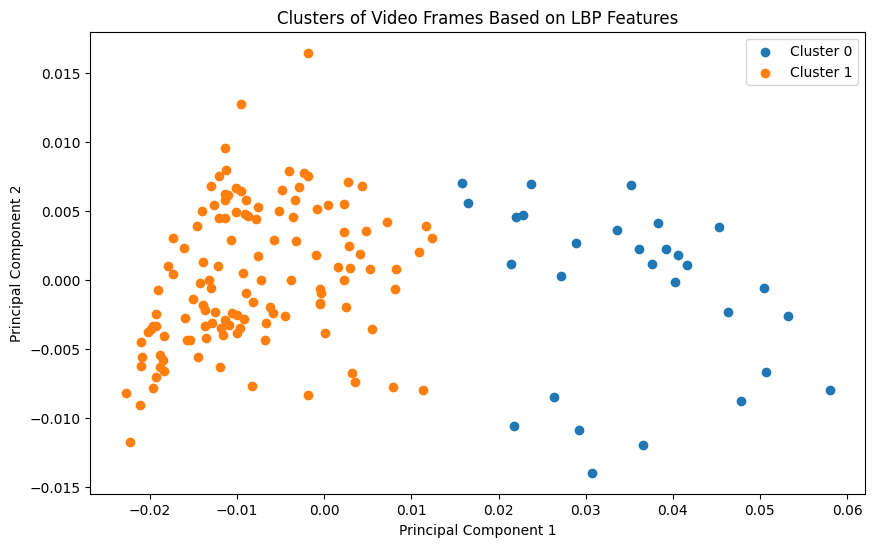

Frame cluster assignments saved to 200_0_LLTframe_cluster_assignments.csv


In [ ]:
RADIUS = 1
N_POINTS = 8 * RADIUS
N_CLUSTERS = 2
FRAME_SIZE = (224, 224)

def extract_lbp_features(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(frame, N_POINTS, RADIUS, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist

def process_video_frame_by_frame(video_path, frame_size=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    lbp_features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        lbp_feature = extract_lbp_features(frame)
        lbp_features.append(lbp_feature)

    cap.release()
    return np.array(lbp_features)

def cluster_lbp_features(features, n_clusters=N_CLUSTERS):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
    return kmeans.labels_, kmeans.cluster_centers_

def visualize_clusters(features, labels, n_clusters=N_CLUSTERS):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        cluster_points = reduced_features[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    plt.legend()
    plt.title('Clusters of Video Frames Based on LBP Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


def save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path):
    df = pd.DataFrame({'Frame': np.arange(len(frame_labels)), 'Cluster': frame_labels})
    df.to_csv(output_csv_path, index=False)
    print(f'Frame cluster assignments saved to {output_csv_path}')

video_path = '/content/drive/Shareddrives/mBSUS/Data/Raw Data/mbsus_case_videos/012-0_LPT.mp4'

lbp_features = process_video_frame_by_frame(video_path)

frame_labels, _ = cluster_lbp_features(lbp_features)

visualize_clusters(lbp_features, frame_labels)

output_csv_path = '200_0_LLTframe_cluster_assignments.csv'
save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path)


This was done to highlight the clinically relevant frames (frames with consolidation assigned by clinicians)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


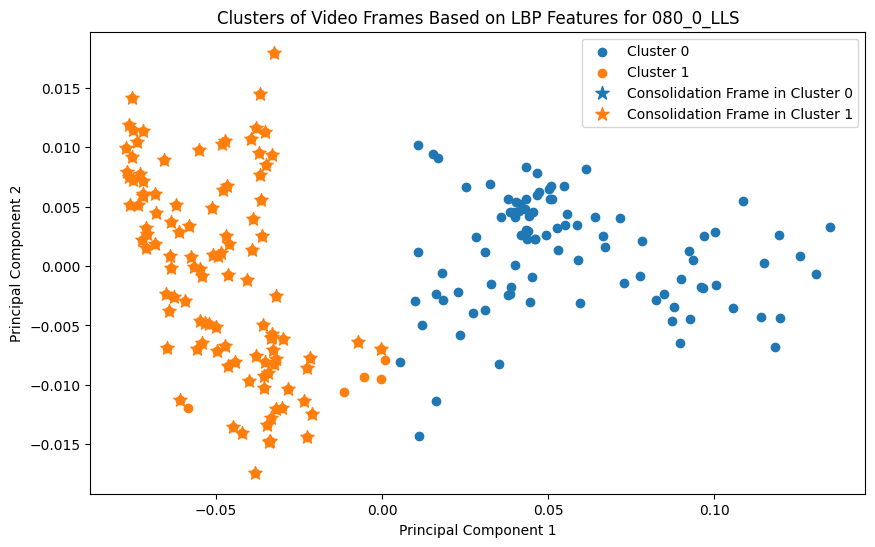

Frame cluster assignments saved to frame_cluster_assignments_080_0_LLS.csv


In [ ]:
RADIUS = 1
N_POINTS = 8 * RADIUS
N_CLUSTERS = 2
FRAME_SIZE = (224, 224)

def extract_lbp_features(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(frame, N_POINTS, RADIUS, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist

def process_video_frame_by_frame(video_path, frame_size=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    lbp_features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        lbp_feature = extract_lbp_features(frame)
        lbp_features.append(lbp_feature)

    cap.release()
    return np.array(lbp_features)

def cluster_lbp_features(features, n_clusters=N_CLUSTERS):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
    return kmeans.labels_, kmeans.cluster_centers_

def visualize_clusters(features, labels, highlighted_frames, n_clusters=N_CLUSTERS):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    plt.figure(figsize=(10, 6))
    cluster_colors = []
    for i in range(n_clusters):
        cluster_points = reduced_features[labels == i]
        scatter = plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
        cluster_colors.append(scatter.get_facecolor()[0])  


    for idx in highlighted_frames:
        plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1],
                    color=cluster_colors[labels[idx]], marker='*', s=100)

    
    plt.scatter([], [], color=cluster_colors[0], marker='*', s=100, label='Consolidation Frame in Cluster 0')
    if len(cluster_colors) > 1:
        plt.scatter([], [], color=cluster_colors[1], marker='*', s=100, label='Consolidation Frame in Cluster 1')

    plt.legend()
    plt.title('Clusters of Video Frames Based on LBP Features for 080_0_LLS')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path):
    df = pd.DataFrame({'Frame': np.arange(len(frame_labels)), 'Cluster': frame_labels})
    df.to_csv(output_csv_path, index=False)
    print(f'Frame cluster assignments saved to {output_csv_path}')

video_path = '/content/drive/Shareddrives/mBSUS/Data/Raw Data/mbsus_case_videos/080-0_LLS.mp4'

lbp_features = process_video_frame_by_frame(video_path)

frame_labels, _ = cluster_lbp_features(lbp_features)

csv_path = '/content/080_0_LLSframe_cluster_assignments.csv'
frame_cluster_df = pd.read_csv(csv_path)
highlighted_frames = frame_cluster_df[(frame_cluster_df['Frame'].between(1,108))]['Frame'].values

visualize_clusters(lbp_features, frame_labels, highlighted_frames)

output_csv_path = 'frame_cluster_assignments_080_0_LLS.csv'
save_frame_cluster_assignments_to_csv(frame_labels, output_csv_path)
